# DSE 317 MACHINE LEARNING 

## Identifying Orbitals of Exoplanet : Identifications of Exoplanet Orbitals through estimating the Orbit Semi Major Axis using Machine Learning

##### By Himadri Sonowal 

###### Instructor : Tanmay Basu, Assistant Professor IISER Bhopal

## Data Importing

In [ ]:
Importing necessary libraries numpy for array calculations and functions, pandas for dataframe functions, matplotib for graphical plotting and imaging and statistics for the median and mode calculation

In [1]:
import numpy as np  # for array operations
import pandas as pd  # for dataframe operations
import matplotlib.pyplot as plt  # for plotting operations
import statistics as s  # for statitics functions
import sklearn

C:\Users\MINATI KONWAR\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Creating three dataframes here:
    train_data: Stores the data values for the exoplanet candidates
    train_labels: Stores the labels for the exoplanet's semi-major axis
    test_data: Stores the test database

In [2]:
train_data = pd.read_csv(r'C:\Users\MINATI KONWAR\Documents\Machine Learning\exoplanet_trn_data.csv')
train_labels = pd.read_csv(r'C:\Users\MINATI KONWAR\Documents\Machine Learning\exoplanet_trn_data_targets.csv',
                           header=None)
test_data = pd.read_csv(r'C:\Users\MINATI KONWAR\Documents\Machine Learning\exoplanet_tst_data.csv')

C:\Users\MINATI KONWAR\AppData\Local\Temp\ipykernel_38784\2560719571.py:1: DtypeWarning: Columns (20,33,34,81,82,106,107,153,154,155,170,172,204,280,281) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv(r'C:\Users\MINATI KONWAR\Documents\Machine Learning\exoplanet_trn_data.csv')


## Processing the Data 

Dataset comprises of various "confirmed" exoplanet candidates that was detected during the Kepler Exoplanet Mission.

In [3]:
print("\nShape of the Training Data: ", train_data.shape)
print("Shape of the Test Data: ", test_data.shape, "\n")


Shape of the Training Data:  (17969, 288)
Shape of the Test Data:  (1997, 288) 



Dataset contains a total of 17969 rows of exoplanets. This are candidates for potential habitable exo-planets. 

The Exoplanets has total of 288 features which were recorded in the mission, which are listed as columns. 

In [4]:
train_data["semi_major_axis"] = train_labels[1].values
train_data

pl_name     hostname pl_letter    hd_name    hip_name  \
0           AU Mic c       AU Mic         c  HD 197481  HIP 102409   
1      Kepler-1476 b  Kepler-1476         b        NaN         NaN   
2       Kepler-255 d   Kepler-255         d        NaN         NaN   
3        Kepler-82 e    Kepler-82         e        NaN         NaN   
4           K2-156 b       K2-156         b        NaN         NaN   
...              ...          ...       ...        ...         ...   
17964   Kepler-245 d   Kepler-245         d        NaN         NaN   
17965    Kepler-28 b    Kepler-28         b        NaN         NaN   
17966  Kepler-1272 b  Kepler-1272         b        NaN         NaN   
17967    HD 102117 b    HD 102117         b  HD 102117   HIP 57291   
17968    Kepler-58 c    Kepler-58         c        NaN         NaN   

              tic_id                       gaia_id  default_flag  sy_snum  \
0      TIC 441420236  Gaia DR2 6794047652729201024             1        1   
1      TIC 164727404  Gaia DR2 2106597487787652352             0        1   
2      TIC 272083669  Gaia DR2 2080202611655694336             0        1   
3       TIC 63372898  Gaia DR2 2125850623586710400             0        1   
4      TIC 176868262  Gaia DR2 3596250888028092160             1        1   
...              ...                           ...           ...      ...   
17964   TIC 63004906  Gaia DR2 2101768089124657664             0        1   
17965   TIC 63122956  Gaia DR2 2125731464014361088             1        1   
17966  TIC 399794186  Gaia DR2 2100148611573075200             0        1   
17967  TIC 267519701  Gaia DR2 5341673851394297600             0        1   
17968  TIC 184471242  Gaia DR2 2073274618947678464             0        1   

       sy_pnum  ...  st_nspec  pl_nespec pl_ntranspec  Unnamed: 282  \
0            2  ...         1          0            0           NaN   
1            1  ...         0          0            0           NaN   
2            3  ...         0          0            0           NaN   
3            5  ...         0          0            0           NaN   
4            1  ...         0          0            0           NaN   
...        ...  ...       ...        ...          ...           ...   
17964        4  ...         0          0            0           NaN   
17965        2  ...         0          0            0           NaN   
17966        1  ...         0          0            0           0.0   
17967        1  ...         0          0            0           NaN   
17968        3  ...         0          0            0           NaN   

      Unnamed: 283 Unnamed: 284 Unnamed: 285 Unnamed: 286 Unnamed: 287  \
0              NaN          NaN          NaN          NaN          NaN   
1              NaN          NaN          NaN          NaN          NaN   
2              NaN          NaN          NaN          NaN          NaN   
3              NaN          NaN          NaN          NaN          NaN   
4              NaN          NaN          NaN          NaN          NaN   
...            ...          ...          ...          ...          ...   
17964          NaN          NaN          NaN          NaN          NaN   
17965          NaN          NaN          NaN          NaN          NaN   
17966          NaN          NaN          NaN          NaN          NaN   
17967          NaN          NaN          NaN          NaN          NaN   
17968          NaN          NaN          NaN          NaN          NaN   

      semi_major_axis  
0              0.1101  
1              0.0932  
2              0.0202  
3              0.0632  
4              0.0149  
...               ...  
17964          0.1995  
17965          0.0620  
17966          0.0000  
17967          0.1532  
17968          0.1228  

[17969 rows x 289 columns]

# Cleaning the Data 

All the columns that have NaN vlaues in them poses issues to our machine learning algorithm. The idea is to remove all the columns that have 50% of their rows missing. Finally we removed the columns which have about 95% and 90% of the total rows as NaN or missing.

In [5]:
missing_values_count = train_data.isnull().sum()
missing_values_count = missing_values_count.sort_values(ascending=False)
columns_with_missingvalues_morethan_05per = missing_values_count.head(
    207).index.values

In [6]:
tr05 = train_data.drop(columns=columns_with_missingvalues_morethan_05per, axis = 1).copy()

In [7]:
print("\nShape of the Training Data: ", train_data.shape)
print("Shape of the Tr05 Dataset ", tr05.shape,"\n")
print("Shape of the Test Dataset ", test_data.shape, "\n")


Shape of the Training Data:  (17969, 289)
Shape of the Tr05 Dataset  (17969, 82) 

Shape of the Test Dataset  (1997, 288) 



#    Identifying Misclassified Columns

We identify all the colummns that should belong to the numerical stature but has impure values in them. We manually relist them as pure numerical values and locate and mark them. 


In [8]:
category_columns = tr05.select_dtypes(include=['object']).columns.tolist()
print("Total number of Object Type Columns: ",
      tr05[category_columns].nunique().sort_values(ascending=False).size)

Total number of Object Type Columns:  37


In [9]:
print("\n Unique Values in the Columns are \n")
print(tr05[category_columns].nunique().sort_values(ascending=False))


 Unique Values in the Columns are 

pl_orbper          10769
pl_orbpererr2       7912
pl_orbpererr1       7097
sy_pm               6015
elat                4908
glat                4898
glon                4897
dec                 4895
decstr              4820
ra                  4720
pl_name             4484
hostname            3379
rastr               3306
tic_id              3256
gaia_id             3229
pl_orbperlim        1909
st_tefflim           884
releasedate          323
pl_pubdate           292
disc_pubdate         283
pl_nnotes            122
st_nphot             104
disc_instrument       95
disc_telescope        85
pl_ntranspec          73
disc_facility         65
st_nrvc               55
disc_locale           46
pl_nespec             39
st_nspec              24
rv_flag               19
discoverymethod       11
ttv_flag              11
pl_controv_flag       11
pul_flag               8
soltype                7
pl_letter              7
dtype: int64


Now, we will leverage our expertise in the specific domain or our knowledge in the field to identify columns that unmistakably pertain to numerical values.

In [10]:
misclassified_columns = [
 "pl_orbper", "pl_orbpererr1", "pl_orbpererr2", "sy_pm", "elat", "glat",
    "glon", "pl_orbperlim", 
 "st_tefflim", "pl_ntranspec", "st_nspec"
]

In [11]:
category_columns = list(set(category_columns) - set(misclassified_columns))
print("\nTheCategorical Columns are: \n")
category_columns


TheCategorical Columns are: 



['disc_locale',
 'disc_telescope',
 'soltype',
 'disc_pubdate',
 'releasedate',
 'disc_instrument',
 'ra',
 'decstr',
 'rastr',
 'ttv_flag',
 'pul_flag',
 'pl_nnotes',
 'pl_controv_flag',
 'st_nphot',
 'pl_name',
 'st_nrvc',
 'pl_letter',
 'dec',
 'pl_nespec',
 'tic_id',
 'disc_facility',
 'hostname',
 'gaia_id',
 'rv_flag',
 'discoverymethod',
 'pl_pubdate']

# Handling Missing Data

Here we will replace the columns with NaN values by taking the median of the data and fill them. The range of data is huge plays a factor here.

In [12]:
def Median(colname):
    pl_orbper = np.array(tr05[colname])
    pl_orbper = pl_orbper[np.logical_not(pd.isnull(pl_orbper))]
    m = []
    alpha = []
    for i in range(len(pl_orbper)):
        try:
            pl_orbper[i] = float(pl_orbper[i])
            m.append(pl_orbper[i])
        except:
            alpha.append(i)
    med = np.median(m)
    return med

for i in tr05.columns:
    if(i not in category_columns):
        tr05[i] = tr05[i].fillna(Median(i))
    else:
        tr05[i] = tr05[i].fillna(s.mode(i))

In [13]:
print("\nThe total number of NaN values in each column is: \n")
print(tr05.isnull().sum())


The total number of NaN values in each column is: 

pl_name            0
hostname           0
pl_letter          0
tic_id             0
gaia_id            0
                  ..
st_nrvc            0
st_nspec           0
pl_nespec          0
pl_ntranspec       0
semi_major_axis    0
Length: 82, dtype: int64


# Preparing Data for Regression Analysis

Transforming categorical data into numerical formats is a fundamental step in preparing data for regression analysis. This process involves converting categorical variables into numeric representations that can be effectively utilized by regression models.

In [14]:
for i in category_columns:
    tr05[i] = pd.Categorical(tr05[i])
    tr05[i] = tr05[i].cat.codes

In [15]:
tr05[category_columns]

disc_locale  disc_telescope  soltype  disc_pubdate  releasedate  \
0               40               0        6           240          303   
1               40              11        3           180           71   
2               40              11        2           180           37   
3               40              11        1           153           35   
4               40              11        6           202          196   
...            ...             ...      ...           ...          ...   
17964           40              11        2           153           37   
17965           40              11        6           131           17   
17966           40              11        6           180          220   
17967           37              41        6            55           17   
17968           40              11        4           139          145   

       disc_instrument    ra  decstr  rastr  ttv_flag  ...  pl_letter   dec  \
0                   81  4299    3002   3148         4  ...          1  1826   
1                   56  2464    1354   1325         4  ...          0  3691   
2                   56  3907    1686   2763         4  ...          2  4023   
3                   56  3494    1183   2352         5  ...          3  3519   
4                   56   396    2596    682         4  ...          0  2070   
...                ...   ...     ...    ...       ...  ...        ...   ...   
17964               56  3314    1090   2172         5  ...          2  3426   
17965               56  3386    1088   2244         5  ...          0  3424   
17966               56   682    3622   3305         6  ...          0    87   
17967               46   349    3205    644         4  ...          0  2056   
17968               56  3944     569   2800         5  ...          1  2888   

       pl_nespec  tic_id  disc_facility  hostname  gaia_id  rv_flag  \
0             13    2869             59        32     3169        0   
1             13    1049             29      1610     1341        0   
2             13    1890             29      2212      713        0   
3             13    3130             29      2820     1464        0   
4             13    1200             23       851     2438        0   
...          ...     ...            ...       ...      ...      ...   
17964         13    3063             29      2201     1045        0   
17965         13    3088             29      2239     1454        0   
17966         13    2677             29      1385      920        0   
17967         13    1602             31       317     2838        1   
17968         13    1271             29      2559      339        0   

       discoverymethod  pl_pubdate  
0                    9         278  
1                    9         176  
2                    9         164  
3                    9         163  
4                    9         226  
...                ...         ...  
17964                9         164  
17965                9         124  
17966                9         241  
17967                8          59  
17968                9         210  

[17969 rows x 26 columns]

In [16]:
import numpy as np

def string_row_remover(tr05,colname):
    alpha = []
    arr = np.array(tr05[colname])

    for i in range(len(arr)):
        try:
            arr[i] = float(arr[i])
        except ValueError:  # Catch ValueError for non-numeric values
            alpha.append(i)

    return alpha

In [17]:
for col in misclassified_columns:
    indexes = string_row_remover(tr05, col)
    tr05 = tr05.drop(indexes)
    tr05 = tr05.reset_index(drop=True)

In [18]:
tr05

pl_name  hostname  pl_letter  tic_id  gaia_id  default_flag  sy_snum  \
0           43        32          1    2869     3169             1        1   
1         2039      1610          0    1049     1341             0        1   
2         2850      2212          2    1890      713             0        1   
3         3832      2820          3    3130     1464             0        1   
4         1091       851          0    1200     2438             1        1   
...        ...       ...        ...     ...      ...           ...      ...   
15771     1914      1503          1     896     1066             0        1   
15772     2819      2201          2    3063     1045             0        1   
15773     2917      2239          0    3088     1454             1        1   
15774      393       317          0    1602     2838             0        1   
15775     3513      2559          1    1271      339             0        1   

       sy_pnum  sy_mnum  cb_flag  ...  sy_tmagerr2  pl_pubdate  releasedate  \
0            2        0        0  ...    -0.032000         278          303   
1            1        0        0  ...    -0.006500         176           71   
2            3        0        0  ...    -0.007900         164           37   
3            5        0        0  ...    -0.008800         163           35   
4            1        0        0  ...    -0.006100         226          196   
...        ...      ...      ...  ...          ...         ...          ...   
15771        3        0        0  ...    -0.007287         176           71   
15772        4        0        0  ...    -0.007800         164           37   
15773        2        0        0  ...    -0.006200         124           17   
15774        1        0        0  ...    -0.006000          59           17   
15775        3        0        0  ...    -0.009200         210          145   

       pl_nnotes  st_nphot  st_nrvc  st_nspec  pl_nespec  pl_ntranspec  \
0              7         1        0         1         13             0   
1              1         0        0         0         13             0   
2              1         0        0         0         13             0   
3              1         0        0         0         13             0   
4              0         0        0         0         13             0   
...          ...       ...      ...       ...        ...           ...   
15771          7         0        0         0         13             2   
15772          1         0        0         0         13             0   
15773          1         0        0         0         13             0   
15774          7         1       48         0         13             0   
15775          1         0        0         0         13             0   

       semi_major_axis  
0               0.1101  
1               0.0932  
2               0.0202  
3               0.0632  
4               0.0149  
...                ...  
15771           0.0905  
15772           0.1995  
15773           0.0620  
15774           0.1532  
15775           0.1228  

[15776 rows x 82 columns]

# Finding Correlation between "semi_major_axis" column and all other columns in the DataFrame 'tr05'

In [19]:
tr05.corr()["semi_major_axis"].sort_values()

discoverymethod   -0.175152
tran_flag         -0.074321
disc_locale       -0.053225
ra                -0.041555
sy_kmag           -0.040569
                     ...   
default_flag       0.052327
disc_telescope     0.061852
ima_flag           0.392637
semi_major_axis    1.000000
sy_mnum                 NaN
Name: semi_major_axis, Length: 71, dtype: float64

In [20]:
tr05 = tr05.drop(columns = ["sy_mnum"], axis =1)

In [21]:
tr05.corr()["semi_major_axis"].sort_values()

discoverymethod   -0.175152
tran_flag         -0.074321
disc_locale       -0.053225
ra                -0.041555
sy_kmag           -0.040569
                     ...   
cb_flag            0.043226
default_flag       0.052327
disc_telescope     0.061852
ima_flag           0.392637
semi_major_axis    1.000000
Name: semi_major_axis, Length: 70, dtype: float64

In [22]:
tr05.corr().style.background_gradient(cmap='coolwarm')

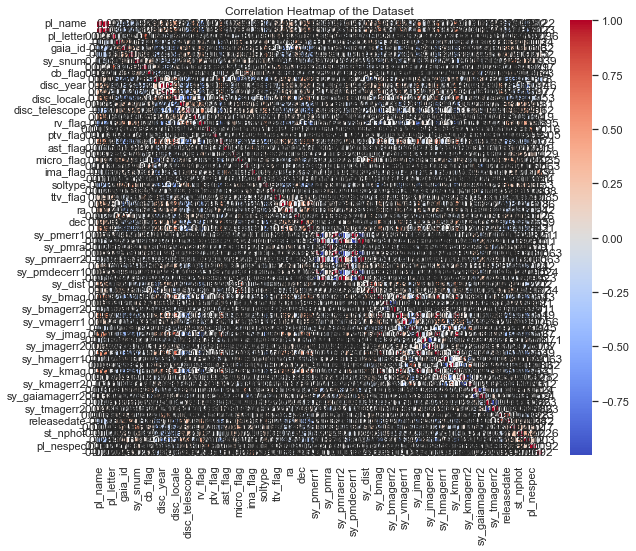

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")  # Set the background style of the plot
correlation_matrix = tr05.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap of the Dataset")
plt.show()

In [24]:
plt.figure(figsize=(500, 300))  
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap of the Dataset")
plt.show()

In [25]:
tr05.corr().semi_major_axis


pl_name           -0.021931
hostname          -0.023302
pl_letter         -0.009631
tic_id             0.023822
gaia_id            0.032062
                     ...   
pl_nnotes          0.017064
st_nphot          -0.002644
st_nrvc           -0.003010
pl_nespec         -0.009211
semi_major_axis    1.000000
Name: semi_major_axis, Length: 70, dtype: float64

In [26]:
tr05.shape

(15776, 81)

In [27]:
for i in misclassified_columns:
    tr05[i] = tr05[i].astype("float")
tr05.corr().semi_major_axis.sort_values()

pl_orbpererr2     -0.792814
discoverymethod   -0.175152
tran_flag         -0.074321
elat              -0.058175
disc_locale       -0.053225
                     ...   
glon               0.068646
ima_flag           0.392637
pl_orbpererr1      0.792743
pl_orbper          0.792995
semi_major_axis    1.000000
Name: semi_major_axis, Length: 81, dtype: float64

In [28]:
tr05.corr().style.background_gradient(cmap='coolwarm')

# Outlier Removal

In [29]:
non_category_columns = list(set(tr05.columns) - set(category_columns))
tr05_out = tr05.copy()

In [30]:
from scipy import stats

z_scores = stats.zscore(
    tr05_out[non_category_columns]
)  # Calculating the z_scores for each value in datafram
z_scores = np.abs(z_scores)  # taking only absolute value of z_score
filtered_entries = (z_scores < 10).all(
    axis=1)  # taking threshold to be |z_score| < 20
tr05_out = tr05_out[
    filtered_entries]  # considering only those entries where we dont have any outlier
tr05_out

pl_name  hostname  pl_letter  tic_id  gaia_id  default_flag  sy_snum  \
0           43        32          1    2869     3169             1        1   
1         2039      1610          0    1049     1341             0        1   
2         2850      2212          2    1890      713             0        1   
3         3832      2820          3    3130     1464             0        1   
4         1091       851          0    1200     2438             1        1   
...        ...       ...        ...     ...      ...           ...      ...   
15771     1914      1503          1     896     1066             0        1   
15772     2819      2201          2    3063     1045             0        1   
15773     2917      2239          0    3088     1454             1        1   
15774      393       317          0    1602     2838             0        1   
15775     3513      2559          1    1271      339             0        1   

       sy_pnum  cb_flag  discoverymethod  ...  sy_tmagerr2  pl_pubdate  \
0            2        0                9  ...    -0.032000         278   
1            1        0                9  ...    -0.006500         176   
2            3        0                9  ...    -0.007900         164   
3            5        0                9  ...    -0.008800         163   
4            1        0                9  ...    -0.006100         226   
...        ...      ...              ...  ...          ...         ...   
15771        3        0                9  ...    -0.007287         176   
15772        4        0                9  ...    -0.007800         164   
15773        2        0                9  ...    -0.006200         124   
15774        1        0                8  ...    -0.006000          59   
15775        3        0                9  ...    -0.009200         210   

       releasedate  pl_nnotes  st_nphot  st_nrvc  st_nspec  pl_nespec  \
0              303          7         1        0       1.0         13   
1               71          1         0        0       0.0         13   
2               37          1         0        0       0.0         13   
3               35          1         0        0       0.0         13   
4              196          0         0        0       0.0         13   
...            ...        ...       ...      ...       ...        ...   
15771           71          7         0        0       0.0         13   
15772           37          1         0        0       0.0         13   
15773           17          1         0        0       0.0         13   
15774           17          7         1       48       0.0         13   
15775          145          1         0        0       0.0         13   

       pl_ntranspec  semi_major_axis  
0               0.0           0.1101  
1               0.0           0.0932  
2               0.0           0.0202  
3               0.0           0.0632  
4               0.0           0.0149  
...             ...              ...  
15771           2.0           0.0905  
15772           0.0           0.1995  
15773           0.0           0.0620  
15774           0.0           0.1532  
15775           0.0           0.1228  

[15377 rows x 81 columns]

In [31]:
tr05_out[["pl_orbper", "semi_major_axis"]].describe()

pl_orbper  semi_major_axis
count  15377.000000     15377.000000
mean     114.698792         0.294999
std      823.208543         0.826415
min        0.240104         0.005800
25%        4.897134         0.054200
50%       11.463474         0.097700
75%       29.221510         0.193100
max    43000.000000        25.000000

In [32]:
tr05_out

pl_name  hostname  pl_letter  tic_id  gaia_id  default_flag  sy_snum  \
0           43        32          1    2869     3169             1        1   
1         2039      1610          0    1049     1341             0        1   
2         2850      2212          2    1890      713             0        1   
3         3832      2820          3    3130     1464             0        1   
4         1091       851          0    1200     2438             1        1   
...        ...       ...        ...     ...      ...           ...      ...   
15771     1914      1503          1     896     1066             0        1   
15772     2819      2201          2    3063     1045             0        1   
15773     2917      2239          0    3088     1454             1        1   
15774      393       317          0    1602     2838             0        1   
15775     3513      2559          1    1271      339             0        1   

       sy_pnum  cb_flag  discoverymethod  ...  sy_tmagerr2  pl_pubdate  \
0            2        0                9  ...    -0.032000         278   
1            1        0                9  ...    -0.006500         176   
2            3        0                9  ...    -0.007900         164   
3            5        0                9  ...    -0.008800         163   
4            1        0                9  ...    -0.006100         226   
...        ...      ...              ...  ...          ...         ...   
15771        3        0                9  ...    -0.007287         176   
15772        4        0                9  ...    -0.007800         164   
15773        2        0                9  ...    -0.006200         124   
15774        1        0                8  ...    -0.006000          59   
15775        3        0                9  ...    -0.009200         210   

       releasedate  pl_nnotes  st_nphot  st_nrvc  st_nspec  pl_nespec  \
0              303          7         1        0       1.0         13   
1               71          1         0        0       0.0         13   
2               37          1         0        0       0.0         13   
3               35          1         0        0       0.0         13   
4              196          0         0        0       0.0         13   
...            ...        ...       ...      ...       ...        ...   
15771           71          7         0        0       0.0         13   
15772           37          1         0        0       0.0         13   
15773           17          1         0        0       0.0         13   
15774           17          7         1       48       0.0         13   
15775          145          1         0        0       0.0         13   

       pl_ntranspec  semi_major_axis  
0               0.0           0.1101  
1               0.0           0.0932  
2               0.0           0.0202  
3               0.0           0.0632  
4               0.0           0.0149  
...             ...              ...  
15771           2.0           0.0905  
15772           0.0           0.1995  
15773           0.0           0.0620  
15774           0.0           0.1532  
15775           0.0           0.1228  

[15377 rows x 81 columns]

In [33]:
tr05_out.corr().semi_major_axis.sort_values().tail(20)

releasedate        0.218664
st_nspec           0.231739
glon               0.237599
gaia_id            0.237656
soltype            0.238388
disc_facility      0.242979
rv_flag            0.279366
disc_telescope     0.296783
micro_flag         0.304490
pl_orbpererr1      0.506324
pl_orbper          0.830892
semi_major_axis    1.000000
cb_flag                 NaN
ptv_flag                NaN
ast_flag                NaN
etv_flag                NaN
ima_flag                NaN
dkin_flag               NaN
pl_orbperlim            NaN
st_tefflim              NaN
Name: semi_major_axis, dtype: float64

In [34]:
const_col = [
    'cb_flag', 'ptv_flag', 'ast_flag', 'etv_flag', 'ima_flag', 'dkin_flag',
    'pl_orbperlim', 'st_tefflim'
]
tr05_out = tr05_out.drop(columns=const_col, axis=1)
print("\nWITH OUTLIERS REMOVED\n\n",
      tr05_out.corr().semi_major_axis.sort_values().tail(20), "\n\n\n")
print("WITHOUT OUTLIERS REMOVED\n\n",
      tr05.corr().semi_major_axis.sort_values().tail(20))


WITH OUTLIERS REMOVED

 decstr             0.134683
tic_id             0.148090
sy_jmagerr1        0.173693
st_nrvc            0.173792
sy_hmagerr1        0.176934
default_flag       0.187995
sy_pm              0.199261
sy_disterr1        0.214471
releasedate        0.218664
st_nspec           0.231739
glon               0.237599
gaia_id            0.237656
soltype            0.238388
disc_facility      0.242979
rv_flag            0.279366
disc_telescope     0.296783
micro_flag         0.304490
pl_orbpererr1      0.506324
pl_orbper          0.830892
semi_major_axis    1.000000
Name: semi_major_axis, dtype: float64 



WITHOUT OUTLIERS REMOVED

 dkin_flag          0.013505
pl_nnotes          0.017064
ast_flag           0.018554
disc_instrument    0.019104
pl_pubdate         0.022972
tic_id             0.023822
sy_gaiamagerr1     0.023932
decstr             0.026479
disc_facility      0.030787
gaia_id            0.032062
soltype            0.033198
releasedate        0.041677
cb_flag   

In [35]:
tr05_out.corr().style.background_gradient(cmap='coolwarm')

## Cleaning TEST DATA

In [36]:
all_columns = test_data.columns
main_columns = tr05_out.columns
deleted_columns = list(set(all_columns) - set(main_columns))

for i in deleted_columns:
    test_data = test_data.drop(columns=i, axis=1)


In [37]:
for i in category_columns:
    test_data[i] = pd.Categorical(test_data[i])
    test_data[i] = test_data[i].cat.codes

In [38]:
def Median1(colname):
    pl_orbper = np.array(test_data[colname])
    pl_orbper = pl_orbper[np.logical_not(pd.isnull(pl_orbper))]
    m = []
    alpha = []
    for i in range(len(pl_orbper)):
        try:
            pl_orbper[i] = float(pl_orbper[i])
            m.append(pl_orbper[i])
        except:
            alpha.append(i)
    med = np.median(m)
    return med

        
for i in test_data.columns:
    if(i not in category_columns):
        test_data[i] = test_data[i].fillna(Median1(i))
    else:
        test_data[i] = test_data[i].fillna(s.mode(i))
print("\nThe total number of NaN values in each column of Test data is: \n")
print(test_data.isnull().sum())


The total number of NaN values in each column of Test data is: 

pl_name         0
hostname        0
pl_letter       0
tic_id          0
gaia_id         0
               ..
st_nphot        0
st_nrvc         0
st_nspec        0
pl_nespec       0
pl_ntranspec    0
Length: 72, dtype: int64


In [39]:
def StringRowRemover1(colname):
    arr = np.array(test_data[colname])
    alpha = []
    for i in range(len(arr)):
        try:
            arr[i] = float(arr[i])
        except:
            alpha.append(i)

    return alpha


for i in test_data.columns:
    indexes = StringRowRemover1(i)
    test_data = test_data.drop(indexes)
    test_data = test_data.set_index(np.arange(0, test_data.shape[0]))
c = 'sy_mnum'
if c in test_data.columns:
    test_data = test_data.drop(columns = ["sy_mnum"], axis =1)
for i in test_data.columns:
    test_data[i] = test_data[i].astype("float")

## Feature Engineering

We use Keplar's Third Law here as it states if we square the Orbital Period (here pl_orbper1") it will be directly proportional to the average of the cube of sun's distance.


In [40]:
tr05_out["pl_orbper1"] = tr05_out["pl_orbper"]**(2 / 3)
tr05_out["pl_orbper2"] = (tr05_out["pl_orbper"]**(2 / 3)) * (6.67 * 10**-11)
test_data["pl_orbper1"] = test_data["pl_orbper"]**(2 / 3)
test_data["pl_orbper2"] = (test_data["pl_orbper"]**(2 / 3)) * (6.67 * 10**-11)
tr05_out.insert(
    len(tr05_out.columns) - 1, 'semi_major_axis',
    tr05_out.pop('semi_major_axis'))

In [41]:
tr05_out.corr().semi_major_axis.sort_values().tail(20), "\n\n\n"

(sy_jmagerr1        0.173693
 st_nrvc            0.173792
 sy_hmagerr1        0.176934
 default_flag       0.187995
 sy_pm              0.199261
 sy_disterr1        0.214471
 releasedate        0.218664
 st_nspec           0.231739
 glon               0.237599
 gaia_id            0.237656
 soltype            0.238388
 disc_facility      0.242979
 rv_flag            0.279366
 disc_telescope     0.296783
 micro_flag         0.304490
 pl_orbpererr1      0.506324
 pl_orbper          0.830892
 pl_orbper1         0.899004
 pl_orbper2         0.899004
 semi_major_axis    1.000000
 Name: semi_major_axis, dtype: float64,
 '\n\n\n')

In [42]:
tr05_out.to_csv('FinalData.csv', index = False)
test_data.to_csv('CleanedTestData.csv', index = False)

## Model  Evaluation

In [43]:
from sklearn.model_selection import GridSearchCV  # Gridsearch for Parameter Tuning
from sklearn.pipeline import Pipeline  # Assembling steps to cross-validate together
from sklearn.metrics import mean_squared_error

In [44]:
tr_final = pd.read_csv('FinalData.csv')
tr_final.head()

pl_name  hostname  pl_letter  tic_id  gaia_id  default_flag  sy_snum  \
0       43        32          1    2869     3169             1        1   
1     2039      1610          0    1049     1341             0        1   
2     2850      2212          2    1890      713             0        1   
3     3832      2820          3    3130     1464             0        1   
4     1091       851          0    1200     2438             1        1   

   sy_pnum  discoverymethod  disc_year  ...  releasedate  pl_nnotes  st_nphot  \
0        2                9       2021  ...          303          7         1   
1        1                9       2016  ...           71          1         0   
2        3                9       2016  ...           37          1         0   
3        5                9       2014  ...           35          1         0   
4        1                9       2018  ...          196          0         0   

   st_nrvc  st_nspec  pl_nespec  pl_ntranspec  pl_orbper1    pl_orbper2  \
0        0       1.0         13           0.0    7.085101  4.725763e-10   
1        0       0.0         13           0.0    4.751911  3.169524e-10   
2        0       0.0         13           0.0    1.030188  6.871357e-11   
3        0       0.0         13           0.0    3.265965  2.178399e-10   
4        0       0.0         13           0.0    0.871185  5.810802e-11   

   semi_major_axis  
0           0.1101  
1           0.0932  
2           0.0202  
3           0.0632  
4           0.0149  

[5 rows x 75 columns]

In [45]:
final_columns = tr_final.columns
X = tr_final[[
    'pl_name', 'hostname', 'pl_letter', 'tic_id', 'gaia_id', 'default_flag',
    'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 'disc_pubdate',
    'disc_locale', 'disc_facility', 'disc_telescope', 'disc_instrument',
    'rv_flag', 'pul_flag', 'tran_flag', 'obm_flag', 'micro_flag', 'soltype',
    'pl_controv_flag', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2',
    'ttv_flag', 'rastr', 'ra', 'decstr', 'dec', 'glat', 'glon', 'elat', 'elon',
    'sy_pm', 'sy_pmerr1', 'sy_pmerr2', 'sy_pmra', 'sy_pmraerr1', 'sy_pmraerr2',
    'sy_pmdec', 'sy_pmdecerr1', 'sy_pmdecerr2', 'sy_dist', 'sy_disterr1',
    'sy_bmag', 'sy_bmagerr1', 'sy_bmagerr2', 'sy_vmag', 'sy_vmagerr1',
    'sy_vmagerr2', 'sy_jmag', 'sy_jmagerr1', 'sy_jmagerr2', 'sy_hmag',
    'sy_hmagerr1', 'sy_hmagerr2', 'sy_kmag', 'sy_kmagerr1', 'sy_kmagerr2',
    'sy_gaiamagerr1', 'sy_gaiamagerr2', 'sy_tmagerr1', 'sy_tmagerr2',
    'pl_pubdate', 'releasedate', 'pl_nnotes', 'st_nphot', 'st_nrvc',
    'st_nspec', 'pl_nespec', 'pl_ntranspec', 'pl_orbper1', 'pl_orbper2'
]].values
y = tr_final["semi_major_axis"].values
X.shape, y.shape

((15377, 74), (15377,))

# Linear Regression


In [46]:

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 

In [47]:
linear = LinearRegression()
linear_parameters = {
    'fit_intercept': [True, False],    # Whether to calculate the intercept for this model 
    'normalize': [True, False],        # Whether the regressors X will be normalized before regression or not
    'copy_X': [True, False]            # If True, X will be copied; else, it may be overwritten.
}
grid_linear = GridSearchCV(linear, linear_parameters, scoring='neg_mean_squared_error', cv=5)
grid_linear.fit(X, y)
linear = grid_linear.best_estimator_
print("\nThe best parameters found for Linear Regression are: \n",
      grid_linear.best_params_)

C:\Users\MINATI KONWAR\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\MINATI KONWAR\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_p


The best parameters found for Linear Regression are: 
 {'copy_X': True, 'fit_intercept': True, 'normalize': False}


In [48]:
mean_squared_error(y,linear.predict(X))

0.06172327000195375

# Support Vector Algorithm

In [49]:
from sklearn.svm import SVR

In [50]:
svr = SVR()
svr_parameters = {
    'kernel' : ['rbf', 'sigmoid'],        # specifies the kernel type to be used in the algorithm 
    'C' : [1, 100],                       # regularization parameter
    'gamma' : [0.01, 0.1]                 # penalty parameter
}
grid_svr = GridSearchCV(svr, svr_parameters, scoring='neg_mean_squared_error', cv=5)
grid_svr.fit(X, y)
svr = grid_svr.best_estimator_
print("\nThe best parameters found for Support Vector Regression are: \n",
      grid_svr.best_params_)


The best parameters found for Support Vector Regression are: 
 {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [51]:
mean_squared_error(y,svr.predict(X))

0.010523071117968083

# Decision Tree Regression

In [52]:
from sklearn.tree import DecisionTreeRegressor

In [53]:
tree = DecisionTreeRegressor()
tree_parameters = {
    "max_depth": [1, 5, 9],                # maximum depth of the tree
    "min_samples_leaf": [1, 5, 10],        # minimum number of samples required to split an internal node
    "max_leaf_nodes": [10, 50, 100]        # maximum number of leaf nodes a decision tree can have
}
grid_tree = GridSearchCV(tree, tree_parameters, scoring='neg_mean_squared_error', cv=5)
grid_tree.fit(X, y)
tree = grid_tree.best_estimator_
print("\nThe best parameters found for Decision Tree Regression are: \n",
      grid_tree.best_params_)


The best parameters found for Decision Tree Regression are: 
 {'max_depth': 9, 'max_leaf_nodes': 100, 'min_samples_leaf': 1}


In [54]:
mean_squared_error(y, tree.predict(X))

0.013110623767642946

# Random Forest Regression

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
forest = RandomForestRegressor()
forest_parameters = {
    "n_estimators": [10, 20],                  # number of trees in the forest
    "min_samples_split": [2, 10],               # minimum number of samples required to split an internal node
    "bootstrap": [True, False],                # whether bootstrap samples are used when building trees.
}
grid_forest = GridSearchCV(forest, forest_parameters, scoring='neg_mean_squared_error', cv=5)
grid_forest.fit(X, y)
forest = grid_forest.best_estimator_
print("\nThe best parameters found for Random Forest Regression are: \n",
      grid_forest.best_params_)


The best parameters found for Random Forest Regression are: 
 {'bootstrap': True, 'min_samples_split': 2, 'n_estimators': 20}


In [57]:
mean_squared_error(y,forest.predict(X))

0.009371719665190195

In [58]:
print(
    f"The r2 score for different regression models are as follows: \nLinear Regression: {linear.score(X,y)} \nDecision Tree Regression: {tree.score(X,y)} \nSupport Vector Regression: {svr.score(X,y)} \nRandom Forest Regression: {forest.score(X,y)}"
)

The r2 score for different regression models are as follows: 
Linear Regression: 0.9096183494438497 
Decision Tree Regression: 0.9808020570539643 
Support Vector Regression: 0.9845910215623442 
Random Forest Regression: 0.9862769504619148


# Predicting Semi-Major Axis 

We use RANDOM FOREST REGRESSION as the final model and use it to predict the final target variable.

In [59]:
X_test = pd.read_csv("CleanedTestData.csv").values

In [60]:
X_test.shape

(1773, 74)

In [61]:
tst_semi_major_axis = forest.predict(X_test)

In [62]:
np.savetxt('predicted_semi_major_axis.txt', tst_semi_major_axis, fmt='%f')